In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
from scipy.linalg import block_diag

In [43]:
layers = [(17, 8), (11, 5)]

P = 0
for n_left, n_right in layers:
    P += n_left*n_right

print('Parameters:', P)

# block 1
alpha = 1.991
n_left, n_right = layers[0]
eigs_left = [1 / (i + 1)**alpha for i in range(n_left)]
eigs_right = [1 / (i + 1)**alpha for i in range(n_right)]
block1 = [initialise_g(n_left, n_right, jax.random.PRNGKey(24), eigs_left=eigs_left, eigs_right=eigs_right)]
matrix1 = KP_sum(block1)

# block 2
n_left, n_right = layers[1] 
eigs_left = [np.exp(-i*0.8) for i in range(n_left)]
eigs_right = [np.exp(-i*0.8) for i in range(n_right)]
block2 = [initialise_g(n_left, n_right, jax.random.PRNGKey(18), eigs_left=eigs_left, eigs_right=eigs_right)]
matrix2 = KP_sum(block2)

G = block_diag(matrix1, matrix2)

Parameters: 191


In [45]:
learned_G, losses, losses1, losses2 = learn_G_multiple_layers(layers, G, iters=25000, K=10)
block1 = KP_sum(learned_G[0])
block2 = KP_sum(learned_G[1])
learned_G_matrix = block_diag(block1, block2)

Iteration: 0, Loss: 1997.796875 for layer [False]
Iteration: 100, Loss: 346.7977294921875 for layer [ True]
Iteration: 200, Loss: 1528.2490234375 for layer [False]
Iteration: 300, Loss: 1844.11962890625 for layer [False]
Iteration: 400, Loss: 318.429931640625 for layer [ True]
Iteration: 500, Loss: 290.26800537109375 for layer [ True]
Iteration: 600, Loss: 1456.697021484375 for layer [False]
Iteration: 700, Loss: 229.11322021484375 for layer [ True]
Iteration: 800, Loss: 1222.802490234375 for layer [False]
Iteration: 900, Loss: 1304.6531982421875 for layer [False]
Iteration: 1000, Loss: 170.03684997558594 for layer [ True]
Iteration: 1100, Loss: 1083.1488037109375 for layer [False]
Iteration: 1200, Loss: 1041.1239013671875 for layer [False]
Iteration: 1300, Loss: 894.1005859375 for layer [False]
Iteration: 1400, Loss: 192.24813842773438 for layer [ True]
Iteration: 1500, Loss: 151.0494842529297 for layer [ True]
Iteration: 1600, Loss: 122.9068832397461 for layer [ True]
Iteration: 1700

In [58]:
K = 2
no_of_iters = 300
key = jax.random.PRNGKey(42)

SOFO_losses = SOFO(K, G, key, no_of_iters)
eig_SOFO_losses1 = new_SOFO2(K, G, G, key, no_of_iters)
eig_SOFO_losses2 = new_SOFO2(K, G, learned_G, key, no_of_iters)

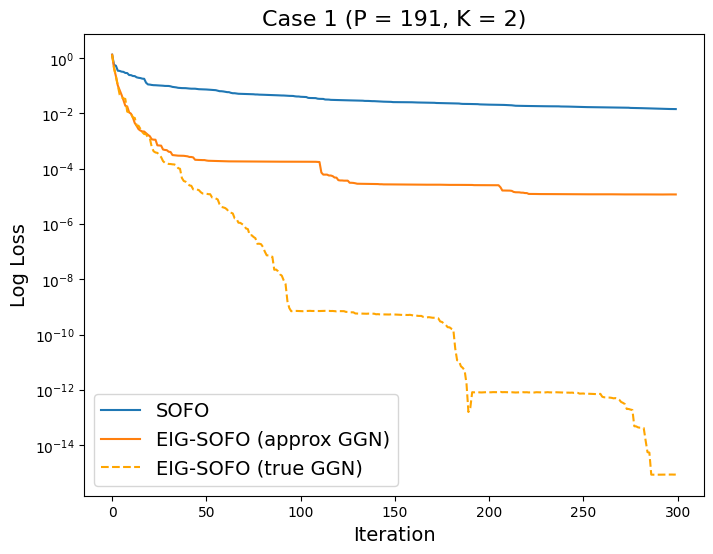

In [60]:
plt.figure(figsize=(8, 6))
plt.plot(SOFO_losses, label='SOFO', linewidth=1.5)
plt.plot(eig_SOFO_losses2, label='EIG-SOFO (approx GGN)', linewidth=1.5)
plt.plot(eig_SOFO_losses1, label='EIG-SOFO (true GGN)', color='orange', linestyle='--', linewidth=1.5)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Log Loss', fontsize=14)
plt.title('Case 1 (P = 191, K = 2)', fontsize=16)
plt.yscale('log')
plt.legend(fontsize=14)
plt.show()

In [61]:
layers = [(13, 5), (13, 5)]

P = 0
for n_left, n_right in layers:
    P += n_left*n_right

print('Parameters:', P)

# block 1
alpha = 1.991
n_left, n_right = layers[0]
eigs_left = [1 / (i + 1)**alpha for i in range(n_left)]
eigs_right = [1 / (i + 1)**alpha for i in range(n_right)]
block1 = [initialise_g(n_left, n_right, jax.random.PRNGKey(24), eigs_left=eigs_left, eigs_right=eigs_right)]
matrix1 = KP_sum(block1)

# block 2
n_left, n_right = layers[1] 
eigs_left = [np.exp(-i*0.1) for i in range(n_left)]
eigs_right = [np.exp(-i*0.1) for i in range(n_right)]
block2 = [initialise_g(n_left, n_right, jax.random.PRNGKey(18), eigs_left=eigs_left, eigs_right=eigs_right)]
matrix2 = KP_sum(block2)

G = block_diag(matrix1, matrix2)

Parameters: 130


In [64]:
learned_G, losses, losses1, losses2 = learn_G_multiple_layers(layers, G, iters=25000, K=10)
block1 = KP_sum(learned_G[0])
block2 = KP_sum(learned_G[1])
learned_G_matrix = block_diag(block1, block2)

Iteration: 0, Loss: 554.2095336914062 for layer [False]
Iteration: 100, Loss: 240.3949737548828 for layer [ True]
Iteration: 200, Loss: 397.01007080078125 for layer [False]
Iteration: 300, Loss: 495.8303527832031 for layer [False]
Iteration: 400, Loss: 192.83071899414062 for layer [ True]
Iteration: 500, Loss: 179.32742309570312 for layer [ True]
Iteration: 600, Loss: 320.1773376464844 for layer [False]
Iteration: 700, Loss: 116.70289611816406 for layer [ True]
Iteration: 800, Loss: 372.6785888671875 for layer [False]
Iteration: 900, Loss: 353.9177551269531 for layer [False]
Iteration: 1000, Loss: 108.066162109375 for layer [ True]
Iteration: 1100, Loss: 239.47488403320312 for layer [False]
Iteration: 1200, Loss: 286.04364013671875 for layer [False]
Iteration: 1300, Loss: 285.8558044433594 for layer [False]
Iteration: 1400, Loss: 89.3109130859375 for layer [ True]
Iteration: 1500, Loss: 66.96817016601562 for layer [ True]
Iteration: 1600, Loss: 57.48369598388672 for layer [ True]
Itera

In [65]:
K = 2
no_of_iters = 300
key = jax.random.PRNGKey(42)

SOFO_losses_next = SOFO(K, G, key, no_of_iters)
eig_SOFO_losses1_next = new_SOFO2(K, G, G, key, no_of_iters)
eig_SOFO_losses2_next = new_SOFO2(K, G, learned_G, key, no_of_iters)

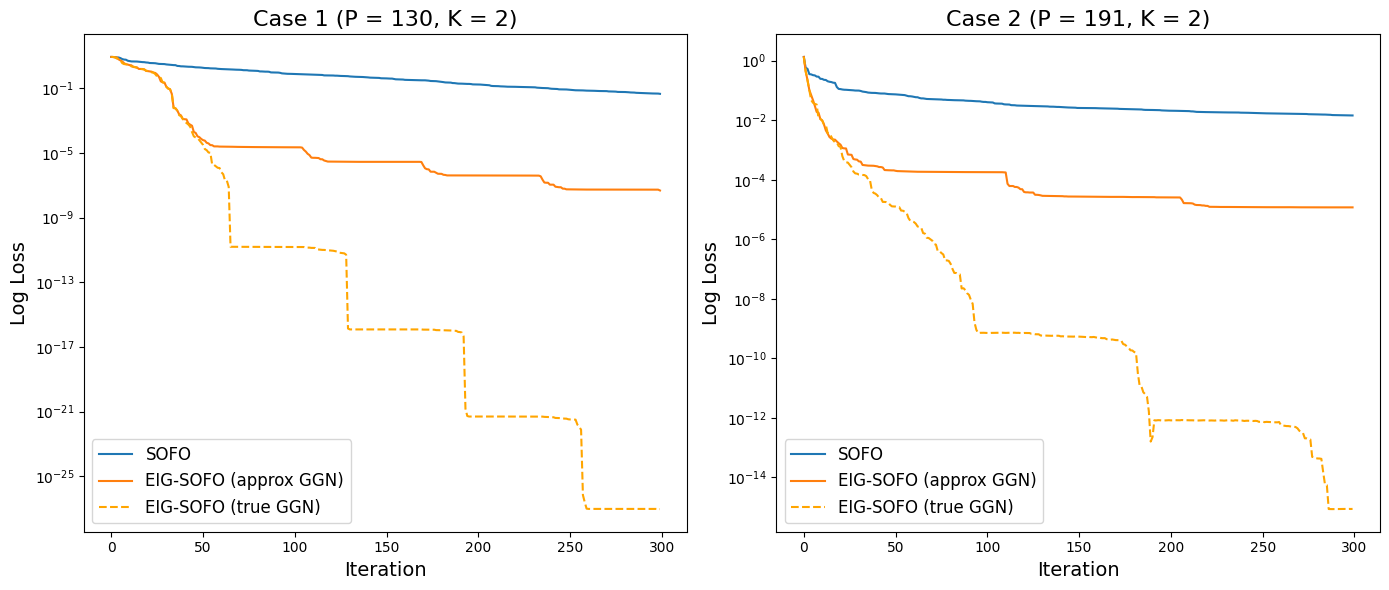

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# First subplot (now Case 2)
axs[0].plot(SOFO_losses_next, label='SOFO', linewidth=1.5)
axs[0].plot(eig_SOFO_losses2_next, label='EIG-SOFO (approx GGN)', linewidth=1.5)
axs[0].plot(eig_SOFO_losses1_next, label='EIG-SOFO (true GGN)', color='orange', linestyle='--', linewidth=1.5)
axs[0].set_xlabel('Iteration', fontsize=14)
axs[0].set_ylabel('Log Loss', fontsize=14)
axs[0].set_yscale('log')
axs[0].set_title('Case 1 (P = 130, K = 2)', fontsize=16)
axs[0].legend(fontsize=12)

# Second subplot (now Case 1)
axs[1].plot(SOFO_losses, label='SOFO', linewidth=1.5)
axs[1].plot(eig_SOFO_losses2, label='EIG-SOFO (approx GGN)', linewidth=1.5)
axs[1].plot(eig_SOFO_losses1, label='EIG-SOFO (true GGN)', color='orange', linestyle='--', linewidth=1.5)
axs[1].set_xlabel('Iteration', fontsize=14)
axs[1].set_ylabel('Log Loss', fontsize=14)
axs[1].set_title('Case 2 (P = 191, K = 2)', fontsize=16)
axs[1].set_yscale('log')
axs[1].legend(fontsize=12)

plt.tight_layout()
plt.savefig('comparison_cases.png', dpi=300)
plt.show()


In [166]:
## make single block with different eigenspectra
layers = [(12, 6)]
n_left, n_right = layers[0]
P = 0
for n_left, n_right in layers:
    P += n_left*n_right
print('Parameters:', P)

# matrix 1:
alpha = 1.5
eigs_left = [1 / (i + 1)**alpha for i in range(n_left)]
eigs_right = [1 / (i + 1)**alpha for i in range(n_right)]
block1 = [initialise_g(n_left, n_right, jax.random.PRNGKey(5), eigs_left=eigs_left, eigs_right=eigs_right)]
matrix1 = KP_sum(block1)

# matrix 3:
eigs_left = [np.exp(-i*0.7) for i in range(n_left)]
eigs_right = [np.exp(-i*0.7) for i in range(n_right)]
block3 = [initialise_g(n_left, n_right, jax.random.PRNGKey(7), eigs_left=eigs_left, eigs_right=eigs_right)]
matrix3 = KP_sum(block3)


Parameters: 72


In [167]:
learned_G1, losses1 = learn_G_one_layer(layers, matrix1, iters=25000, K=10)
learned_G1_matrix = KP_sum(learned_G1[0])

learned_G3, losses3 = learn_G_one_layer(layers, matrix3, iters=25000, K=10)
learned_G3_matrix = KP_sum(learned_G3[0])

Iteration: 0, Loss: 513.6358642578125
Iteration: 100, Loss: 447.1667785644531
Iteration: 200, Loss: 507.8370666503906
Iteration: 300, Loss: 370.1486511230469
Iteration: 400, Loss: 435.1366271972656
Iteration: 500, Loss: 350.7748718261719
Iteration: 600, Loss: 259.92938232421875
Iteration: 700, Loss: 345.1697082519531
Iteration: 800, Loss: 298.0900573730469
Iteration: 900, Loss: 301.63409423828125
Iteration: 1000, Loss: 264.6602783203125
Iteration: 1100, Loss: 232.1230010986328
Iteration: 1200, Loss: 204.59608459472656
Iteration: 1300, Loss: 240.96096801757812
Iteration: 1400, Loss: 180.20936584472656
Iteration: 1500, Loss: 156.09666442871094
Iteration: 1600, Loss: 190.98472595214844
Iteration: 1700, Loss: 140.74549865722656
Iteration: 1800, Loss: 125.77601623535156
Iteration: 1900, Loss: 120.04059600830078
Iteration: 2000, Loss: 120.97053527832031
Iteration: 2100, Loss: 77.43788146972656
Iteration: 2200, Loss: 89.76689910888672
Iteration: 2300, Loss: 77.85679626464844
Iteration: 2400, 

In [168]:
def plot_eigenvector_alignment(Q, Qhat, k=None):
    """
    Plot cosine similarity between true and learned eigenvectors.
    Assumes Q and Qhat are (P x k) matrices with eigenvectors in columns.
    """
    if k is None:
        k = Q.shape[1]
    
    # Ensure Q and Qhat are the same shape
    assert Q.shape == Qhat.shape, "Q and Qhat must have the same shape"

    # Compute cosine similarity for each eigenvector
    cos_thetas = [np.abs(np.dot(Q[:, i], Qhat[:, i])) for i in range(k)]

    # Plot
    plt.figure(figsize=(7, 4))
    plt.plot(range(1, k+1), cos_thetas, '-o')
    plt.xlabel("Eigenvector index")
    plt.ylabel(r"$|\langle q_i, \hat{q}_i \rangle|$")
    plt.title("Alignment of True vs. Learned Eigenvectors")
    plt.ylim(0, 1.05)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_eigenvector_alignment(Q_true[:, :50], Q_learned[:, :50])


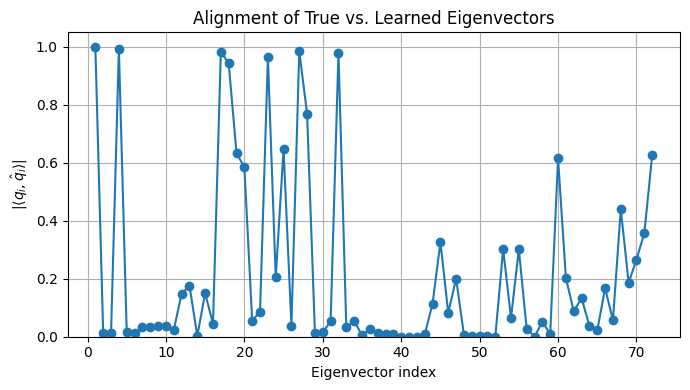

In [169]:
Q_learned, _ = get_eigenvectors(learned_G3)
Q_true, _, _ = np.linalg.svd(matrix3)
plot_eigenvector_alignment(Q_true, Q_learned, k=72)

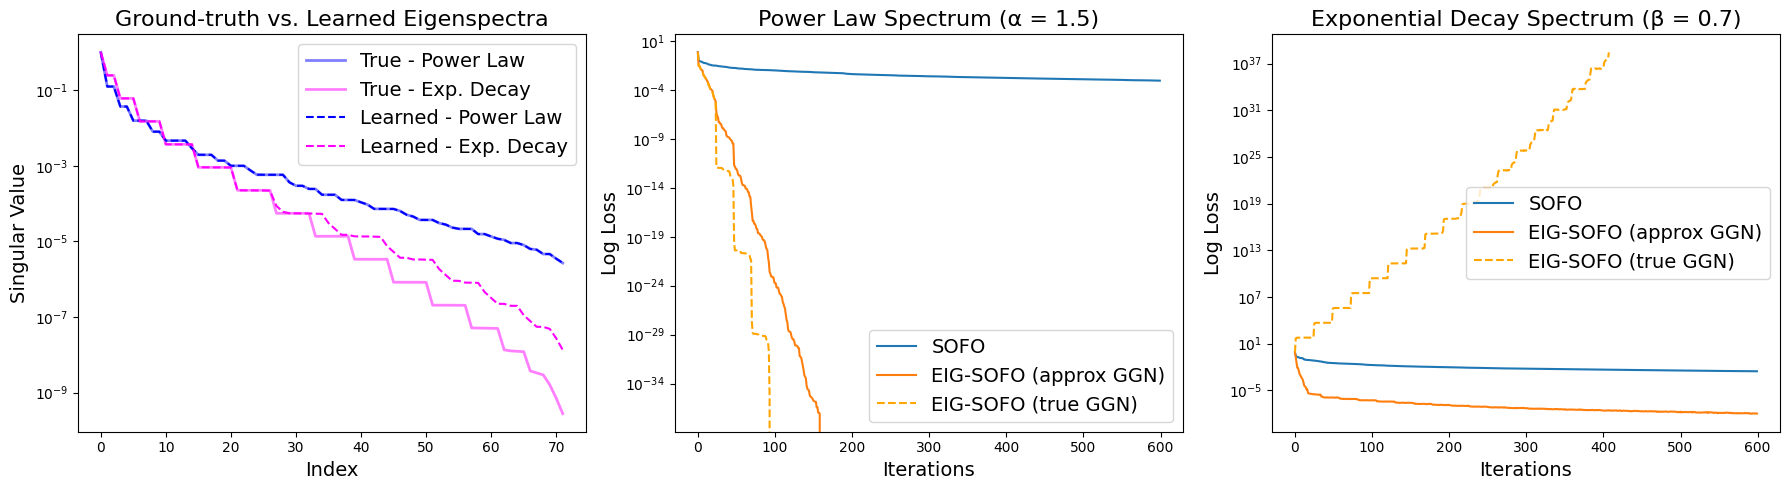

In [ ]:
from jax import random

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Singular values
_, s, _ = np.linalg.svd(matrix1)
axs[0].plot(s, label='True - Power Law', color='blue', alpha=0.5, linewidth=2)
_, s, _ = np.linalg.svd(matrix3)
axs[0].plot(s, label='True - Exp. Decay', color='magenta', alpha=0.5, linewidth=2)
_, s, _ = np.linalg.svd(learned_G1_matrix)
axs[0].plot(s, label='Learned - Power Law', color='blue', linestyle='--')
_, s, _ = np.linalg.svd(learned_G3_matrix)
axs[0].plot(s, label='Learned - Exp. Decay', color='magenta', linestyle='--')
axs[0].set_xlabel('Index', fontsize=14)
axs[0].set_ylabel('Singular Value', fontsize=14)
axs[0].set_yscale('log')
axs[0].set_title('Ground-truth vs. Learned Eigenspectra', fontsize=16)
axs[0].legend(fontsize=14)

# Plot 2: SOFO and EIG-SOFO for matrix1
SOFO_losses = SOFO(K, matrix1, key, no_of_iters)
eig_SOFO_losses2 = new_SOFO2(K, matrix1, matrix1, key, no_of_iters, damping=False)
eig_SOFO_losses3 = new_SOFO2(K, matrix1, learned_G1_matrix, key, no_of_iters, damping=False)
axs[1].plot(SOFO_losses, label='SOFO')
axs[1].plot(eig_SOFO_losses3, label='EIG-SOFO (approx GGN)')
axs[1].plot(eig_SOFO_losses2, label='EIG-SOFO (true GGN)', color='orange', linestyle='--')
axs[1].set_xlabel('Iterations', fontsize=14)
axs[1].set_ylabel('Log Loss', fontsize=14)
axs[1].set_yscale('log')
axs[1].set_title('Power Law Spectrum (α = 1.5)', fontsize=16)
axs[1].legend(fontsize=14)

# Plot 3: SOFO and EIG-SOFO for matrix3
SOFO_losses_matrix3 = SOFO(K, matrix2, key, no_of_iters)
eig_SOFO_losses2_matrix3 = new_SOFO2(K, matrix3, matrix3, key, no_of_iters, damping=False)
eig_SOFO_losses3_matrix3 = new_SOFO2(K, matrix3, learned_G3_matrix, key, no_of_iters, damping=False)
axs[2].plot(SOFO_losses_matrix3, label='SOFO')
axs[2].plot(eig_SOFO_losses3_matrix3, label='EIG-SOFO (approx GGN)')
axs[2].plot(eig_SOFO_losses2_matrix3, label='EIG-SOFO (true GGN)', color='orange', linestyle='--')
axs[2].set_xlabel('Iterations', fontsize=14)
axs[2].set_ylabel('Log Loss', fontsize=14)
axs[2].set_yscale('log')
axs[2].set_title('Exponential Decay Spectrum (β = 0.7)', fontsize=16)
axs[2].legend(fontsize=14)

plt.tight_layout()
plt.savefig('eigenspectra_comparison_eigSOFO.png', dpi=300)
plt.show()
